In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

# Problem statement : Predicting whether patient has heart disease or not ? 

In [56]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### EDA

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Model Training

### Train Test split

In [59]:
x = df.drop('target',axis=1)
y = df['target']

In [60]:
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2,random_state= 15, stratify=y) 

In [61]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
256,58,1,0,128,259,0,0,130,1,3.0,1,2,3
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
122,41,0,2,112,268,0,0,172,1,0.0,2,0,2
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,42,0,2,120,209,0,1,173,0,0.0,1,0,2
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
185,44,1,0,112,290,0,0,153,0,0.0,2,1,2
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3


### Instantiating KNN Classifier

In [62]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train,y_train)

KNeighborsClassifier()

## Model Evaluation

### Training Data evaluation

In [65]:
# training data evaluation

y_pred_train = knn_clf.predict(x_train)

In [66]:
y_pred_train[5:15]

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [67]:
y_train[5:15].to_numpy()

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

In [68]:
knn_clf.score(x_train,y_train)

0.7768595041322314

In [69]:
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("cnf matrix:\n",cnf_matrix)

acc = accuracy_score(y_train,y_pred_train)
print("accuracy :\n", acc)

clf_report = classification_report(y_train,y_pred_train)
print("clf report :\n",clf_report)


cnf matrix:
 [[ 81  29]
 [ 25 107]]
accuracy :
 0.7768595041322314
clf report :
               precision    recall  f1-score   support

           0       0.76      0.74      0.75       110
           1       0.79      0.81      0.80       132

    accuracy                           0.78       242
   macro avg       0.78      0.77      0.77       242
weighted avg       0.78      0.78      0.78       242



In [70]:
# testing data evaluation

y_pred_test = knn_clf.predict(x_test)

In [71]:
cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("cnf matrix:\n",cnf_matrix)

acc = accuracy_score(y_test,y_pred_test)
print("accuracy :\n", acc)

clf_report = classification_report(y_test,y_pred_test)
print("clf report :\n",clf_report)


cnf matrix:
 [[19  9]
 [14 19]]
accuracy :
 0.6229508196721312
clf report :
               precision    recall  f1-score   support

           0       0.58      0.68      0.62        28
           1       0.68      0.58      0.62        33

    accuracy                           0.62        61
   macro avg       0.63      0.63      0.62        61
weighted avg       0.63      0.62      0.62        61



## Hyperparameter tuning

In [79]:
knn_model = KNeighborsClassifier() # new KNN clf

In [80]:
hyperpara = {'n_neighbors' : np.arange(3,20),
            'p': [1,2]} #to check parameters

### using Gridsearch_cv

In [81]:
gscv_knn_model = GridSearchCV(knn_model,hyperpara,cv=3)
gscv_knn_model.fit(x_train,y_train)
gscv_knn_model.best_estimator_

KNeighborsClassifier(n_neighbors=16, p=1)

In [82]:
new_knn_model = gscv_knn_model.best_estimator_
new_knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=16, p=1)

In [83]:
train_acc = new_knn_model.score(x_train,y_train)
print(train_acc)

0.743801652892562


In [84]:
test_acc = new_knn_model.score(x_test,y_test)
test_acc

0.5901639344262295

### Train on different k values 

### p = 1 

In [93]:
training_acc = []
testing_acc = []

for k in range(3,20):
    knn_clf_model = KNeighborsClassifier(n_neighbors=k,p =1)
    knn_clf_model.fit(x_train,y_train)
    
    train_acc = knn_clf_model.score(x_train,y_train)
    training_acc.append(train_acc)
    
    test_acc = knn_clf_model.score(x_test,y_test)
    testing_acc.append(test_acc)

In [94]:
print(training_acc)
print(testing_acc)

[0.8264462809917356, 0.8181818181818182, 0.7892561983471075, 0.78099173553719, 0.7933884297520661, 0.8016528925619835, 0.7603305785123967, 0.768595041322314, 0.7603305785123967, 0.756198347107438, 0.756198347107438, 0.7520661157024794, 0.7644628099173554, 0.743801652892562, 0.756198347107438, 0.7479338842975206, 0.7479338842975206]
[0.6557377049180327, 0.639344262295082, 0.6721311475409836, 0.6557377049180327, 0.639344262295082, 0.639344262295082, 0.6557377049180327, 0.6229508196721312, 0.6229508196721312, 0.6229508196721312, 0.6065573770491803, 0.6229508196721312, 0.5737704918032787, 0.5901639344262295, 0.5901639344262295, 0.6065573770491803, 0.6229508196721312]


Text(0, 0.5, 'Accuracy')

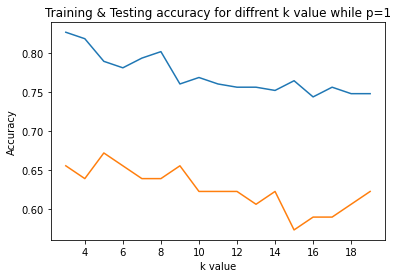

In [95]:
k = np.arange(3,20)
plt.plot(k,training_acc)
plt.plot(k,testing_acc)
plt.title('Training & Testing accuracy for diffrent k value while p=1')
plt.xlabel('k value')
plt.ylabel('Accuracy')

### p = 2

In [96]:
training_acc = []
testing_acc = []

for k in range(3,20):
    knn_clf_model = KNeighborsClassifier(n_neighbors=k,p =2)
    knn_clf_model.fit(x_train,y_train)
    
    train_acc = knn_clf_model.score(x_train,y_train)
    training_acc.append(train_acc)
    
    test_acc = knn_clf_model.score(x_test,y_test)
    testing_acc.append(test_acc)

In [97]:
print(training_acc)
print(testing_acc)

[0.7892561983471075, 0.78099173553719, 0.7768595041322314, 0.7768595041322314, 0.7727272727272727, 0.7520661157024794, 0.743801652892562, 0.71900826446281, 0.7066115702479339, 0.71900826446281, 0.7272727272727273, 0.7272727272727273, 0.7107438016528925, 0.6900826446280992, 0.7148760330578512, 0.7107438016528925, 0.7066115702479339]
[0.6065573770491803, 0.639344262295082, 0.6229508196721312, 0.6229508196721312, 0.639344262295082, 0.6065573770491803, 0.6229508196721312, 0.6229508196721312, 0.639344262295082, 0.6229508196721312, 0.6065573770491803, 0.5901639344262295, 0.6065573770491803, 0.5901639344262295, 0.5901639344262295, 0.5737704918032787, 0.6065573770491803]


Text(0, 0.5, 'Accuracy')

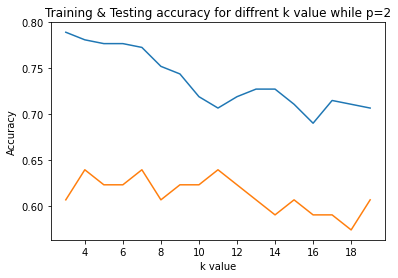

In [98]:
k = np.arange(3,20)
plt.plot(k,training_acc)
plt.plot(k,testing_acc)
plt.title('Training & Testing accuracy for diffrent k value while p=2')
plt.xlabel('k value')
plt.ylabel('Accuracy')